# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read data into a dataframe
retail_data = pd.read_excel("Online Retail.xlsx")

### ii. Visualize top and bottom rows

In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# obtain a basic summary of the data
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# idenitify data types of columns
retail_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Task 2: Data Cleaning

In [8]:
# check for any duplicated rows in the data
retail_data.duplicated().sum()

np.int64(5268)

### Considering each row should be unique, it's best to remove exact duplicates.
### They are redundant and would lead to false analysis

In [9]:
# drop duplicates
retail_data = retail_data.drop_duplicates()

In [10]:
# check for any missing values
retail_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
retail_data.isna().sum() / len(retail_data)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002709
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.251634
Country        0.000000
dtype: float64

#### **25% of CustomerID are missing** and only **.2% of descriptions** are missing. 
#### I could drop the missing descriptions, however I'll have to fill the missing customer IDs.

In [12]:
# Attempt to fill missing customer values grouped by InvoiceNo. (Assuming transaction ID are linked to unique customers)
# Fill missing CustomerID with mode of ID's for each Invoice
retail_data["CustomerID"] = retail_data.groupby("InvoiceNo")["CustomerID"].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
retail_data["CustomerID"].isna().sum()

np.int64(135037)

#### This didn't change anything. 
#### It would mean that **Invoice numbers with missing Customer IDs have no valid ID**.
#### Let's check this

In [13]:
# filter all data with missing CustomerID
missing_id_rows = retail_data[retail_data["CustomerID"].isna()]
# group data by Invoice, identify the number of ID's present and sum their count. If zero, there are ni IDs present
missing_id_rows.groupby("InvoiceNo")["CustomerID"].count().sum()

np.int64(0)

### Considering this, I will fill missing customer ID's with a placeholder and drop missing descriptions

In [14]:
# drop missing descriptions
retail_data = retail_data.dropna(subset="Description")
# fill missing customer ID's with a placeholder
retail_data["CustomerID"] = retail_data["CustomerID"].fillna(999999.0)

#### Considering the columns StockCode and Description containt the same information

#### I'll drop the column StockCode. It's easier for me to understand the descriptions.

In [15]:
Data = retail_data.drop(columns="StockCode")
Data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 3: Explore the basic statistics of the dataset.

In [16]:
Data.nlargest(5, "Quantity")

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
421632,573008,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom


In [17]:
Data.nsmallest(5, "Quantity")

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
225529,556690,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,999999.0,United Kingdom
225530,556691,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,999999.0,United Kingdom
4287,C536757,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom


#### I'll drop the invoices with quantity 80995 and 74215, considering they were all returned and are extreme outliers

In [18]:
Data = Data.drop([540421, 61619, 540422, 61624])

#### i. Dealing with order quantities

In [19]:
# Average quantity of products purchased 
# Filter negative quantities (cancellations or returns)
mean_qty = Data[Data["Quantity"] > 0]["Quantity"].mean()
print(f"On average the quantity of a product purchased is {round(mean_qty)}")

On average the quantity of a product purchased is 10


In [20]:
# Group orders by invoice and sum the quantities to get the total number of products ordered for that transaction
order_sizes = Data[Data["Quantity"] > 0].groupby("InvoiceNo")["Quantity"].sum()
# Average quantity per transaction
print(f"On average there are {round(order_sizes.mean())} items per order")

On average there are 271 items per order


In [21]:
# Typical order size
print(f"In general there are {round(order_sizes.median())} items per order")
#Most common order size
print(f"The most common order size is {round(order_sizes.mode()[0])} ")

In general there are 150 items per order
The most common order size is 1 


In [22]:
print(f"Order size standard deviation is {order_sizes.std()}")
print(f"Order size range is {order_sizes.max() - order_sizes.min()}")

Order size standard deviation is 564.4377010891118
Order size range is 15048


The mean quantity of products purchased for orders **(271)** is almost twice as big and the median **(150)**.

This indicates there are some **big outliers that are skewing the data**, and if removed these values will be different.

A more reasonable assumption will be to consider **around 150 items per order**. 

Also the standard deviation of quantities is very big **(564.43)**, indication order sizes vary largely, though most likely affected by outliers in the data. 

The range also comfirms the **presence of outliers** in the data

#### ii. Dealing with Unit Prices

In [23]:
# select positive unit prices and apply functions of central tendency and dispersion
prices = Data[Data["UnitPrice"] > 0]["UnitPrice"]
print(f"Mean of product prices is ${round(prices.mean(), 2)} ")
print(f"Median of product prices is ${prices.median()} ") 
print(f"Mode of product prices is ${prices.mode()[0]} ")
print(f"Standard deviation of prices is {round(prices.std(), 2)}")
print(f"Range of prices is {prices.max() - prices.min()}")

Mean of product prices is $4.7 
Median of product prices is $2.1 
Mode of product prices is $1.25 
Standard deviation of prices is 95.08
Range of prices is 38969.999


The range of prices is high, indicating the presence of outliers.

Considering the presence of these outliers, on average **products with a price around $2.1 are sold**.

The standard deviation is a high, meaning product prices vary widely. though **most products sold cost $1.25**.

In [24]:
# group data by Invoice and observe amount spent per order
order_prices = Data[Data["UnitPrice"] > 0].groupby("InvoiceNo")["UnitPrice"].sum()
print(f"Mean of order prices is ${round(order_prices.mean(), 2)} ")
print(f"Median of order prices is ${order_prices.median()} ")
print(f"Mode of order prices is ${order_prices.mode()[0]} ")
print(f"Standard deviation of order prices is {round(order_prices.std(), 2)}")
print(f"Range of order prices is {order_prices.max() - order_prices.min()}")

Mean of order prices is $105.42 
Median of order prices is $36.62 
Mode of order prices is $1.25 
Standard deviation of order prices is 504.9
Range of order prices is 38969.99


Our **mean and median differ widely**, and from the range we can tell the data is skewed. 

So on average **customers spend around $36.62** on unique orders.

The standard deviation is high, so we can tell that **the amount spent by customers varries widely**.

## 4. Perform data visualization 

In [25]:
# I'll filter some extreme outliers before carrying out visualization
Q1 = Data[["Quantity", "UnitPrice"]].quantile(0.25)
Q3 = Data[["Quantity", "UnitPrice"]].quantile(0.75)
IQR = Q3 - Q1
filtered_data = Data[~((Data[["Quantity", "UnitPrice"]]  < (Q1 - 5 * IQR)) | (Data[["Quantity", "UnitPrice"]]  > (Q3 + 5 * IQR))).any(axis=1)]

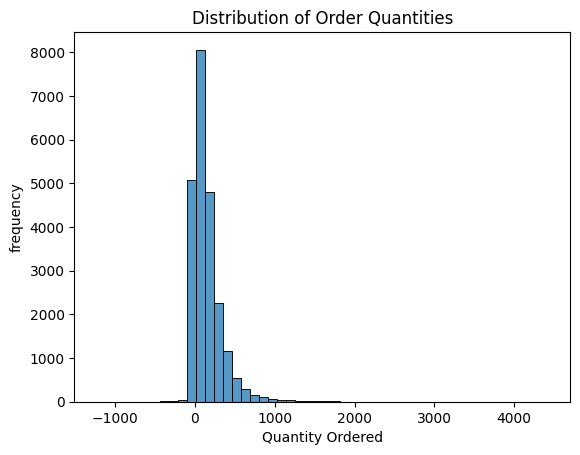

In [26]:
# Visualize product quantities using histogram
sns.histplot(filtered_data.groupby("InvoiceNo")["Quantity"].sum(), bins=50)
plt.xlabel("Quantity Ordered")
plt.ylabel("frequency")
plt.title("Distribution of Order Quantities")
plt.show()

From this image, we can tell **most order sizes are small**, but **a few very big ones are present**. 

We have **some negative quantities too, probably returns**.

Also the distribution is **right-skewed and will determine data transformation for model building**. 

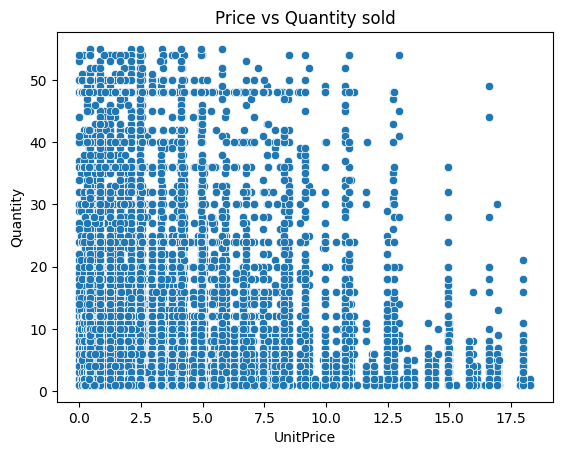

In [27]:
# Observe relationship between proce and quantity
sns.scatterplot(data=filtered_data[filtered_data["Quantity"] > 0], x="UnitPrice", y="Quantity")
plt.title("Price vs Quantity sold")
plt.show()

From the graph we can see points are **most dense at a lower price**.

As the price increases, the we have fewer quantities. So **the more expensive a product, the fewer it's quantity sold**.

However, **this pattern is not clear with cheaper products**.

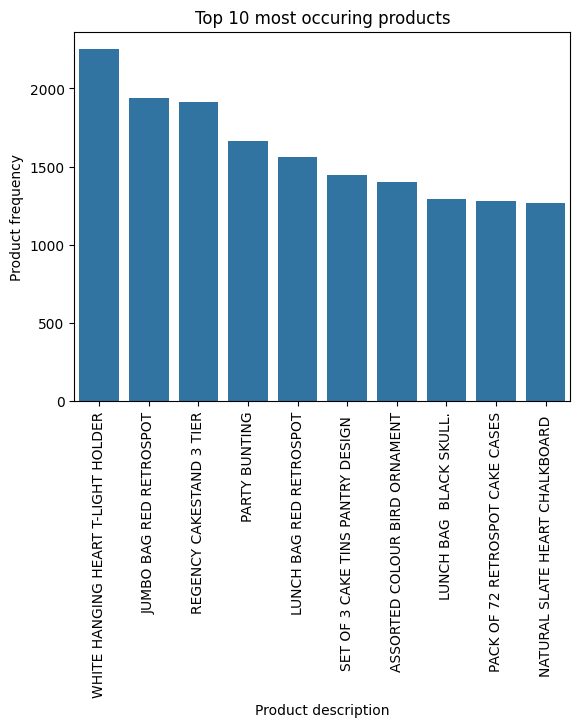

In [28]:
# Visualize most common products
product_freq = filtered_data["Description"].value_counts().nlargest(10)
sns.barplot(x=product_freq.index, y=product_freq.values)
plt.ylabel("Product frequency")
plt.xlabel("Product description")
plt.title("Top 10 most occuring products")
plt.xticks(rotation=90)
plt.show()

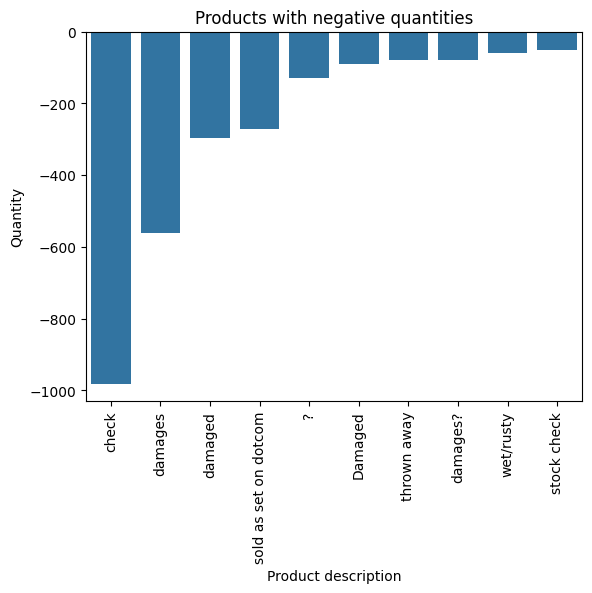

In [29]:
# Visualize products with negative quantities
negatives = filtered_data.groupby("Description")["Quantity"].sum().nsmallest(10)
sns.barplot(x=negatives.index, y=negatives.values)
plt.ylabel("Quantity")
plt.xlabel("Product description")
plt.title("Products with negative quantities")
plt.xticks(rotation=90)
plt.show()

## 5. Sales Trend

In [39]:
# create a new feature containing the month and year of a transaction
filtered_data.loc[:, "Month"] = filtered_data["InvoiceDate"].dt.to_period("M")
monthly_sales = filtered_data.groupby("Month")["Quantity"].sum()

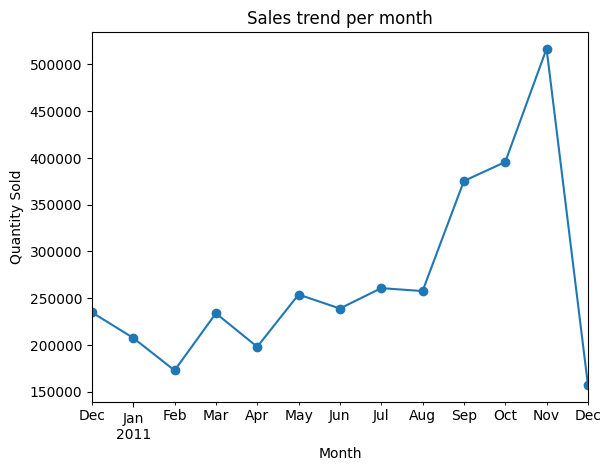

In [31]:
# Visualize monthly sales trend
monthly_sales.plot(marker='o')
plt.ylabel("Quantity Sold")
plt.title("Sales trend per month")
plt.show()

Througout the year, **sales appear to lie between 150k - 250k quantities** , and around the end of the year **(in September)**

**sales increase**, reaching their **peak in the month of November**. However, **sales dropped drastically in the month of December. Why?**

### ii. Busiest days

In [40]:
# create a new feature containing the day of the week for each transaction
filtered_data.loc[:, "Days"] = filtered_data["InvoiceDate"].dt.day_name()
busy_days = filtered_data.groupby("Days")["Quantity"].sum()

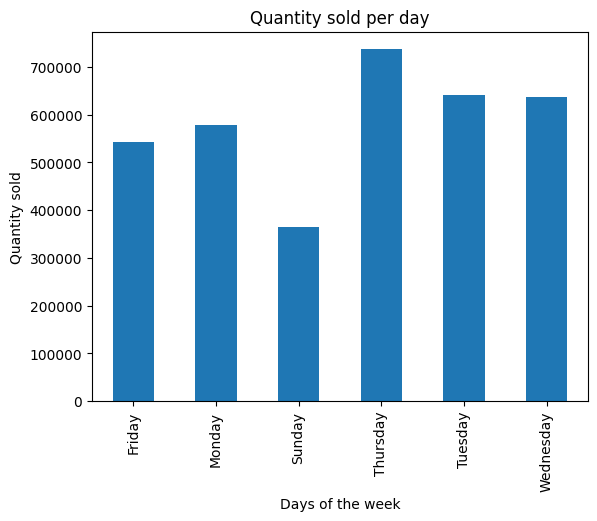

In [33]:
busy_days.plot.bar()
plt.title("Quantity sold per day")
plt.xlabel("Days of the week")
plt.ylabel("Quantity sold")
plt.show()

**Thursday is the busiest day of the week**, and **Sunday the least busy**. 

Turns out there are **no sales on Saturdays. Why?**

## 6. Top Selling Products and buying Countries

### i. Top selling products based on Quantity

In [34]:
# group data by description, extract the sum of quantities sold per product and most frequent month for these transactions
products = filtered_data.groupby("Description", as_index=False).agg({"Quantity": 'sum',
                                                                      "Month": lambda x: x.mode()[0]})
top10 = products.nlargest(10, "Quantity") # select top 10 products

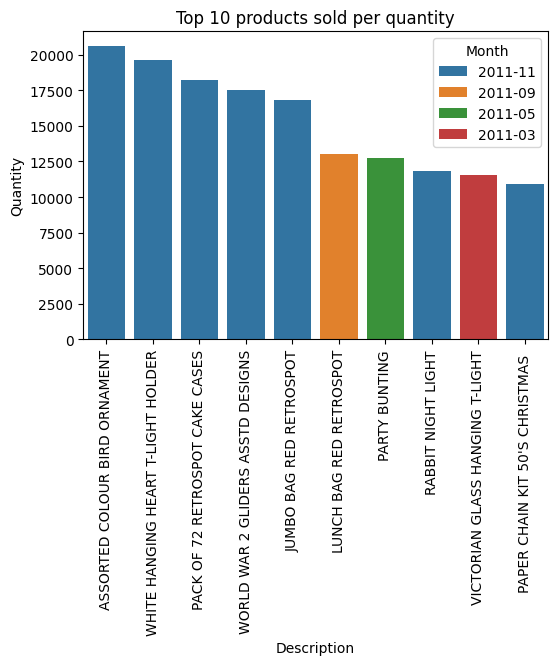

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(top10, x="Description", y="Quantity", hue="Month")
plt.xticks(rotation=90)
plt.title("Top 10 products sold per quantity")
plt.show()

We can see the **top products based on their quantity sold**, and on **which month they sold most**.

This should be meaningful to **help manage inventory to suit specific months**.

### ii. Top Countries

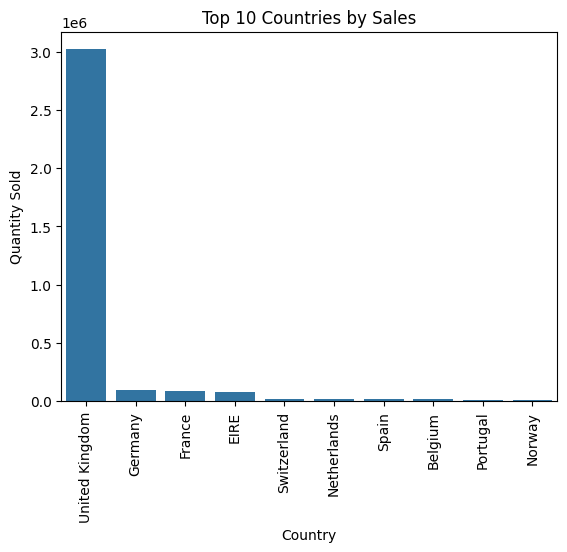

In [36]:
# group data by country, sum quantities and select top 10 rows
top_countries = filtered_data.groupby("Country")["Quantity"].sum().nlargest(10)

sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel("Country")
plt.ylabel("Quantity Sold")
plt.title("Top 10 Countries by Sales")
plt.xticks(rotation=90)
plt.show()

Most **purchases happen in Europe**, and **majority come from the UK**.

### iii. Top customers

In [37]:
# ignore place holder
customers = filtered_data[filtered_data["CustomerID"] != 999999.0]

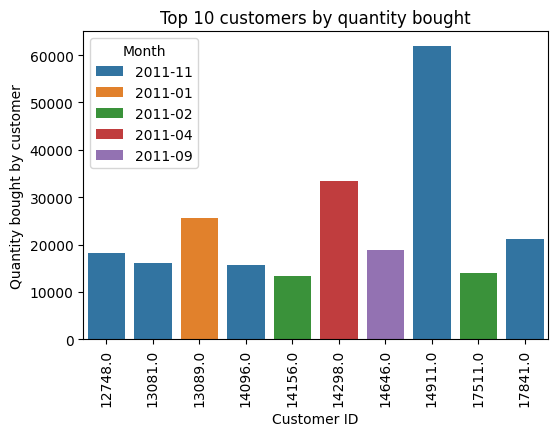

In [38]:
# group data by CustomerID, extract the sum of quantities bought and most frequent month for these transactions
products = customers.groupby("CustomerID", as_index=False).agg({"Quantity": 'sum',
                                                                "Month": lambda x: x.mode()[0]})
top10 = products.nlargest(10, "Quantity") # select top 10 customers

plt.figure(figsize=(6,4))
sns.barplot(top10, x="CustomerID", y="Quantity", hue="Month")
plt.ylabel("Quantity bought by customer")
plt.xlabel("Customer ID")
plt.xticks(rotation=90)
plt.title("Top 10 customers by quantity bought")
plt.show()

We can see the top customers by ID, the quantity bought per transaction, and which months they bought the most.

## 7 Outliers and Anomalies

The columns **Quantity and UnitPrice** contained many **outliers, some very extreme**.

they **affect the value for the average order sizes or amount spent per transaction** which could be misleading. 

They also cause **misleading information on the variation of transactions**. However, some of these outlier are meaningful,

and **removing them could would mean some valuable information could be lost**.

Considering anomalies, many of the **items have a unit price of $0**, and it was unclear what that means. 

Many **customer IDs are missing** and it's not clear if those are mistakes or anonymous buyers. 

**Some product descriptions did not make any sense**, and it's not clear if those are actual products or mistakes.

Some products were bought and returned at some extreme quantities, probably mistakes.

Considering this is an online business, **it's abnormal to have no sales on Saturdays**. 

## 8. Conclusion and summaries 
##### (NB: Most insights and conclusions are found after each task/section)

#### i. **Data quality and cleaning**

- Customer ID is missing **25%** of IDs, and Description has some missing values. 

  I dropped missing descriptions and filled IDs with a place holder, however further investigation is needed.
- Some **exact duplicates exist** and were removed for this analysis. 
- Some quantities have negative values and some unit prices are **$0.0** . It not clear what that means.

#### ii. **Some distribution and patterns in Data**
- Most **orders are small**, however some **very large orders** exist and quantities vary widely
- Most **product sold have a low cost**, however some **expensive products are sold too**, and prices vary widely.
- Most sales happen in **Europe**, with around **90%** of transactions happening in the **UK**. 
- **Customer purchases vary** widely and they can be **grouped  for targeted marketing**.
- **Some quantiies have high negative values**, and if these are returns, the business needs to analyze what's wrong with these products.
- The **White hanging heart T-light holder** is the most common item bought, however **Assorted colour bird ornament** were sold at higher quantities.

#### iii. **Further consideration**
- Why do **sales spike in November and fall drastically in December**?
- Why are there **no sales on Saturdays**?
- Why do **90% of sales happen in the UK** and fow can we increase sales in other countries?
- What's the best way to deal with missing IDs, outliers in quantities and prices of $0.0 . 
